In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns


In [2]:
df = pd.read_csv("E:\customerchurn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop("customerID",axis = 1,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df = df.fillna(0)

In [7]:
df.replace({'No phone service':"No", 'No internet service':"No"},inplace=True)


In [8]:
df.replace({'No':0,'Yes':1},inplace = True)

In [9]:
df.replace({'Male':0 ,'Female':1},inplace= True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [11]:
df = pd.get_dummies(data = df , columns = ["InternetService","Contract","PaymentMethod"], drop_first = True)


In [12]:
X = df.drop("Churn",axis = True)
y = df.Churn

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
y_train_reshaped = tf.reshape(y_train,[5634,1])

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, input_shape=(23,), activation='sigmoid')
])

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit(X_train,y_train,epochs = 200)

Epoch 1/200
177/177 [==============================] - 1s 2ms/step - loss: 43.1291 - accuracy: 0.4237
Epoch 2/200
177/177 [==============================] - 0s 2ms/step - loss: 2.7316 - accuracy: 0.5451
Epoch 3/200
177/177 [==============================] - 0s 2ms/step - loss: 1.6044 - accuracy: 0.5685
Epoch 4/200
177/177 [==============================] - 0s 2ms/step - loss: 0.7615 - accuracy: 0.6759
Epoch 5/200
177/177 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7485
Epoch 6/200
177/177 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7627
Epoch 7/200
177/177 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.7673
Epoch 8/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7682
Epoch 9/200
177/177 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7664
Epoch 10/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4966 - accur

177/177 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7836
Epoch 82/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.7946
Epoch 83/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7868
Epoch 84/200
177/177 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.7824
Epoch 85/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.7870
Epoch 86/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.7852
Epoch 87/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.7836
Epoch 88/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.7911
Epoch 89/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.7909
Epoch 90/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 

177/177 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.7939
Epoch 161/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.7930
Epoch 162/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.7870
Epoch 163/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7863
Epoch 164/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7932
Epoch 165/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7918
Epoch 166/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7870
Epoch 167/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7822
Epoch 168/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.7804
Epoch 169/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4783 - a

In [19]:
model.evaluate(X_test , y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8169


[0.3989691734313965, 0.8168914318084717]

In [20]:
y_pred = model.predict(X_train)
y_pred

177/177 [==============================] - 0s 1ms/step


array([[0.07860845],
       [0.07883805],
       [0.6785746 ],
       ...,
       [0.2347008 ],
       [0.81688637],
       [0.033314  ]], dtype=float32)

In [21]:
y_predict =[]
for i in y_pred:
    if i<0.5:
        y_predict.append(0)
    else:
        y_predict.append(1)

In [22]:
cf = tf.math.confusion_matrix(labels = y_train_reshaped, predictions =y_predict)


<AxesSubplot:>

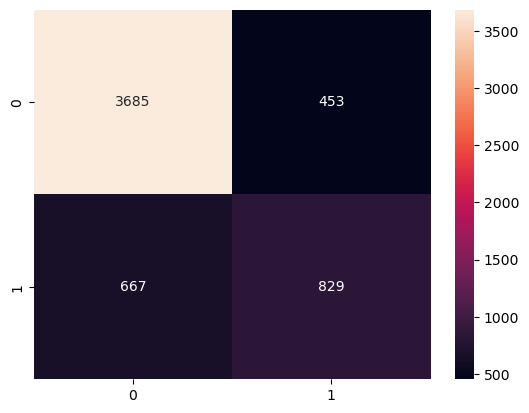

In [23]:
sns.heatmap(cf,annot = True,fmt= "d")

In [45]:
df0 = df[df["Churn"]==0]
df1 = df[df["Churn"]==1]

In [46]:
df0.shape

(5174, 24)

In [47]:
df1.shape

(1869, 24)

In [48]:
reduced = df0.sample(df0.shape[0])

In [49]:
min = pd.concat([reduced,df1])

In [50]:
X_min = min.drop("Churn",axis= 1)
y_min = min.Churn

In [51]:
X_min_train, X_min_test, y_min_train, y_min_test = train_test_split(X_min, y_min, test_size=0.20, random_state=42)


In [31]:
model.fit(X_min_train,y_min_train,epochs = 200)

Epoch 1/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.7985
Epoch 2/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.7914
Epoch 3/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.7849
Epoch 4/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.7913
Epoch 5/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.7890
Epoch 6/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.7920
Epoch 7/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.7904
Epoch 8/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.7891
Epoch 9/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.7856
Epoch 10/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4558 - accura

177/177 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.7911
Epoch 82/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.7966
Epoch 83/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.7909
Epoch 84/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.7881
Epoch 85/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.7946
Epoch 86/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.7964
Epoch 87/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.7959
Epoch 88/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7948
Epoch 89/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.7909
Epoch 90/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 

177/177 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7854
Epoch 161/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.7854
Epoch 162/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.7916
Epoch 163/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.7938
Epoch 164/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7881
Epoch 165/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7900
Epoch 166/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.7843
Epoch 167/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.7914
Epoch 168/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.7906
Epoch 169/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4980 - a

In [32]:
model.evaluate(X_min_test,y_min_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.8126


[0.4380137026309967, 0.8126330971717834]

In [41]:
y_min_pred = model.predict(X_min_train)

177/177 [==============================] - 0s 1ms/step


In [53]:
y_min_predict = []
for i in y_min_pred:
    if i < 0.5:
        y_min_predict.append(0)
    else:
        y_min_predict.append(1) 

In [56]:
cf1 = tf.math.confusion_matrix(labels=y_min_train, predictions=y_min_predict)

<AxesSubplot:>

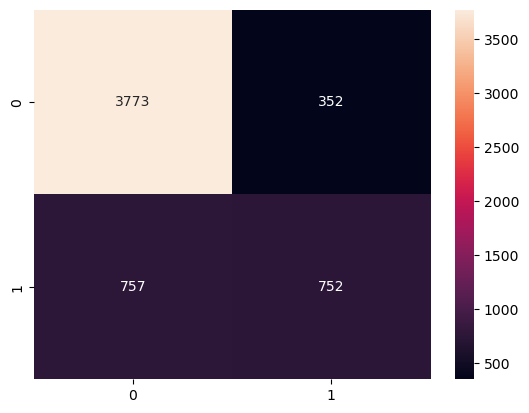

In [57]:
sns.heatmap(cf1 ,annot=True, fmt = 'd')

In [59]:
increased = df1.sample(df1.shape[0], replace = True)

In [60]:
max = pd.concat([increased,df0])

In [61]:
X_max = max.drop("Churn",axis = 1)
y_max = max.Churn

In [63]:
X_max_train, X_max_test, y_max_train, y_max_test = train_test_split(X_max, y_max, test_size=0.20, random_state=42)

In [65]:
model.fit(X_max_train,y_max_train,epochs = 200)

Epoch 1/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7900
Epoch 2/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7829
Epoch 3/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7872
Epoch 4/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7845
Epoch 5/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.7950
Epoch 6/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.7914
Epoch 7/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.7925
Epoch 8/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.7982
Epoch 9/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.7927
Epoch 10/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4455 - accura

177/177 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.7902
Epoch 82/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.7950
Epoch 83/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4558 - accuracy: 0.7907
Epoch 84/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.7938
Epoch 85/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7906
Epoch 86/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7914
Epoch 87/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.8001
Epoch 88/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.7968
Epoch 89/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7904
Epoch 90/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 

177/177 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.7952
Epoch 161/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8012
Epoch 162/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7907
Epoch 163/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.7886
Epoch 164/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.7938
Epoch 165/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.7952
Epoch 166/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7936
Epoch 167/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.7890
Epoch 168/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7925
Epoch 169/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4391 - a

In [66]:
model.evaluate(X_max_test,y_max_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7814


[0.506231427192688, 0.7814052700996399]

In [68]:
y_max_pred = model.predict(X_max_train)

177/177 [==============================] - 0s 1ms/step


In [69]:
y_max_predict = []
for i in y_max_pred:
    if i<0.5:
        y_max_predict.append(0)
    else:
        y_max_predict.append(1)

In [71]:
cf2 = tf.math.confusion_matrix(labels = y_max_train, predictions = y_max_predict)

<AxesSubplot:>

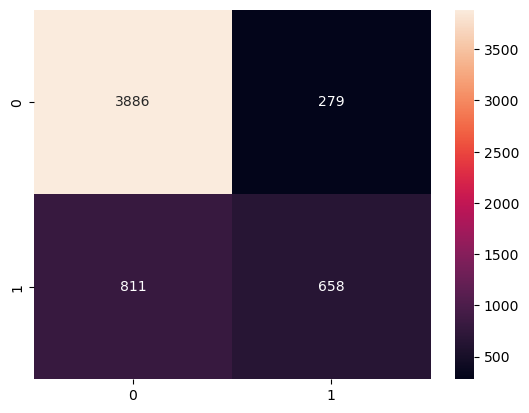

In [72]:
sns.heatmap(cf2,annot = True,fmt = "d")